In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras import losses, optimizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
print(np.add(np.array([[1,2,3], [1,2,3]]), 3*np.array([[1,2,3], [1,2,3]])))

In [14]:
class Particle:
    def __init__(self, weights, velocity, omega, c1, c2):
        self.weights = weights
        self.best_weights = weights
        self.velocity = velocity
        self.omega = omega
        self.c1 = c1
        self.c2 = c2
        self.best_valutation = 0
        
    def update(best_particle):
        update_velocity(best_particle)
        update_particle()
        return self.weights
    
    def update_velocity(bp):
        # v = Wv + c1r1(pi - xi) + c2r2(g - xi)
        # v - ubrzanje, W - omega, c1 i c2 unapred zadati parametri
        # r1 i r2 slucajni brojevi iz (0,1) uniformne raspodele
        # pi - najbolje resenje trenutne jedinke
        # g - najbojle globalno resenje
        r1 = random.random()
        r2 = random.random()
        self.velocity = self.omega * self.velocity + self.c1*r1*(np.add(np.array(self.best_weights), (-1)*np.array(self.weights))) + self.c2*r2*(np.add(np.array(bp) - np.array(self.weights))) 
        
        
    def update_particle():
        # xi = xi + vi
        self.weights = np.add(np.array(self.weigths), self.velocity)
        
    def update_valuation(valuation):
        if(valuation > self.best_valuation):
            self.best_valuation = valuation
            self.best_weights = weights
        

(381, 30)
Pre skaliranja:
 [1.374e+01 1.791e+01 8.812e+01 5.850e+02 7.944e-02 6.376e-02 2.881e-02
 1.329e-02 1.473e-01 5.580e-02 2.500e-01 7.574e-01 1.573e+00 2.147e+01
 2.838e-03 1.592e-02 1.780e-02 5.828e-03 1.329e-02 1.976e-03 1.534e+01
 2.246e+01 9.719e+01 7.259e+02 9.711e-02 1.824e-01 1.564e-01 6.019e-02
 2.350e-01 7.014e-02]

Posle skaliranja:
 [-0.08342045 -0.30118956 -0.13444934 -0.1693076  -1.18668639 -0.73453467
 -0.7171642  -0.87646215 -1.22563341 -1.01248185 -0.50865545 -0.85819112
 -0.59470011 -0.36653867 -1.34639141 -0.51615775 -0.43468422 -0.93167015
 -0.83931134 -0.6819258  -0.1622091  -0.50840876 -0.27469162 -0.24025207
 -1.53744791 -0.44770394 -0.54115259 -0.80193507 -0.86954212 -0.80022184]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_____________________________________________________________

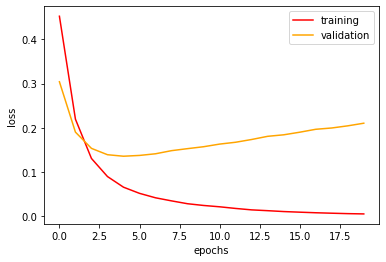

In [3]:
from sklearn import datasets
data = datasets.load_breast_cancer()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=0.33)
print(x_train.shape)


from sklearn import preprocessing
print('Pre skaliranja:\n', x_train[0])
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print('\nPosle skaliranja:\n', x_train[0])


from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.summary()


from keras import losses, optimizers
model.compile(optimizer='adam', 
              loss=losses.binary_crossentropy, 
              metrics=['accuracy'])

history = model.fit(x_train, 
                    to_categorical(y_train), 
                    epochs=20, 
                    batch_size=16, 
                    verbose=1, 
                    validation_split=0.3)


from matplotlib import pyplot as plt
%matplotlib inline
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')



188/188 [==============================] - 0s 35us/step
Test loss: 0.1571335560503475
Test accuracy: 0.957446813583374


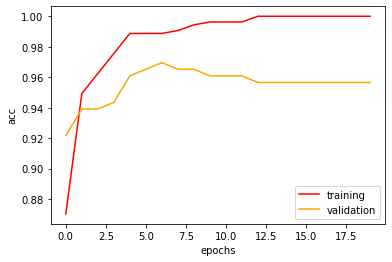

In [4]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')


test_loss, test_acc = model.evaluate(x_test, to_categorical(y_test))
print("Test loss:", test_loss) 
print("Test accuracy:", test_acc)

In [5]:
print(type(model.get_weights()))

print(type(model.get_weights()[0].tolist()))

print(type(model.get_weights()[0][0]))

print(type(model.get_weights()[0][0][0]))

for i in model.get_weights():
    print(i.shape)
    
shapes = [i.shape for i in model.get_weights()]

print("Shapes ", shapes)

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>
(30, 100)
(100,)
(100, 40)
(40,)
(40, 2)
(2,)
Shapes  [(30, 100), (100,), (100, 40), (40,), (40, 2), (2,)]


In [13]:
weights = model.get_weights()

velocity = 0.7 * np.array(weights) + 1.2*0.5*(np.add(np.array(weights), (-0.3)*np.array(weights))) + 1.4*0.7*(np.add(np.array(weights), np.array(weights)))         
print(velocity)

[array([[ 0.8096752 ,  0.72323847, -0.7995161 , ..., -0.27408305,
         0.38944656,  0.16702941],
       [ 0.01652166,  0.61626995,  0.27271286, ..., -0.03663182,
         0.32614875, -0.28898987],
       [ 0.69170606,  0.19269809, -0.62463486, ...,  0.8942397 ,
        -0.20718555,  0.56196386],
       ...,
       [-0.02761429,  0.40917462, -0.14213932, ...,  0.5659277 ,
         0.32858425,  0.32420903],
       [ 0.42048538,  0.63625675,  0.43574595, ..., -0.1106258 ,
        -0.67758775, -0.7012603 ],
       [-0.7110162 ,  0.3167897 ,  0.2825024 , ..., -0.53804874,
         0.36593845,  0.43583146]], dtype=float32)
 array([ 0.0941624 ,  0.0501471 ,  0.21589391, -0.11555676, -0.00080607,
        0.22015384,  0.26773638,  0.19919844,  0.10344064,  0.18964684,
        0.16596833,  0.32798147,  0.12926573,  0.13322487,  0.08033632,
        0.28010494,  0.14964396,  0.10739642,  0.2641131 ,  0.21492872,
        0.31222534, -0.07896425,  0.14949887, -0.11553098,  0.15324326,
        0.